<a href="https://colab.research.google.com/github/june-oh/2023_AI_Academy_ASR/blob/main/3_Audio_Classification_using_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기초 MLP 모델 실습

## Torch Dataset
앞선 실습에서 사용했던 free-spoken-digit-dataset을 데이터로 사용

MLP model을 이용하여 오디오를 분류하는 실습

git cloning : 
```bash
!git clone https://github.com/Jakobovski/free-spoken-digit-dataset
```

In [1]:
!git clone https://github.com/Jakobovski/free-spoken-digit-dataset

Cloning into 'free-spoken-digit-dataset'...
remote: Enumerating objects: 4243, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 4243 (delta 16), reused 8 (delta 8), pack-reused 4212
Receiving objects: 100% (4243/4243), 30.38 MiB | 17.76 MiB/s, done.
Resolving deltas: 100% (120/120), done.


import packages

In [3]:
import torch        # model, datset, tensor
import torchaudio   # feature extraction, load audio
from pathlib import Path  #file path

## PyTorch Daset Object 개념 
`torch.utils.data.Dataset`의 subclass는 `__len__`과 `__getitem__`을 구현하기 위해 필요한 객체이다
- `__len__` : 데이터셋의 아이템 수를 반환
- `__getitem__`: 샘플과 레이블을 반환


[그림]데이터를 직접적으로 가지고 있지 않지만 `__len__` 과 `__getitem__`을 통해 접근가능

<img src="https://drek4537l1klr.cloudfront.net/stevens2/Figures/CH07_F02_Stevens2_GS.png" width=600>

In [8]:
x = [0,1,2,3]
print(type(x))
print(dir(x))

# __len__
print(len(x))

# __getitem__
print(x[0])


<class 'list'>
['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']
4
0


In [9]:
from torch.utils.data import Dataset,DataLoader

## Dataset Calss 의 형식

아래와 같이 3개의 method를 override하여 작성

```python
class MyCustomDataset(Dataset):
    def __init__(self, ...):
        # initialize Class
        
    def __getitem__(self, index):
        # return samlpe(data) and label 
        return (img, label)

    def __len__(self):
      # of how many examples(images?) you have
        return count 
```

AudioDataSet 선언될 때에는 전체 데이터셋의 파일 목록을 가져오고

호출될때에는 샘플의 경로를 리턴

In [10]:
!ls

free-spoken-digit-dataset  sample_data


In [11]:
class AudioDataSet(Dataset) : 
  def __init__(self):
    self.filelist = list(Path("./free-spoken-digit-dataset/recordings/").glob("*.wav"))

  def __len__(self):    
    return len(self.filelist)

  def __getitem__(self,idx):
    return self.filelist[idx]


      

In [16]:
AudioData = AudioDataSet()

In [17]:
len(AudioData)

3000

In [18]:
AudioData[0]

PosixPath('free-spoken-digit-dataset/recordings/8_nicolas_25.wav')

In [19]:
AudioData[:10]

[PosixPath('free-spoken-digit-dataset/recordings/8_nicolas_25.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/3_george_18.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/1_lucas_29.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/4_jackson_16.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/5_george_12.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/2_jackson_29.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/1_theo_15.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/2_jackson_2.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/5_theo_41.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/1_george_45.wav')]

In [22]:
batch_size = 64
train_loader = DataLoader(AudioData,batch_size=batch_size,shuffle=False)

In [24]:
??DataLoader

In [23]:
n_epoch = 50
for epoch in range(n_epoch) :
  for batch in train_loader :
    pass

TypeError: ignored

In [29]:
class AudioDataSet(Dataset) : 
  def __init__(self):
    self.filelist = list(Path("./free-spoken-digit-dataset/recordings/").glob("*.wav"))
    self.sr = 8000

  def __len__(self):    
    return len(self.filelist)

  def __getitem__(self,idx):
    audio_path = self.filelist[idx] 
    y,sr = torchaudio.load(audio_path)
    label = int(audio_path.stem.split("_")[0])
    return y ,label  

In [30]:
train = AudioDataSet()
train[0]

(tensor([[-0.0078, -0.0156, -0.0078,  ..., -0.0078, -0.0078, -0.0078]]), 8)

In [32]:
n_epoch = 50
train_loader = DataLoader(train)
for epoch in range(n_epoch) :
  for batch in train_loader :
    pass

KeyboardInterrupt: ignored

split train/valid/test

In [112]:
class AudioDataSet(Dataset) : 
  def __init__(self,train=True):
    self.filelist = list(Path("./free-spoken-digit-dataset/recordings/").glob("*.wav"))
    self.sr = 8000
    self.train_list,self.test_list = self._split_data()
    #print(len(self.train_list),len(self.test_list))
    if train :
      self.audio_list = self.train_list
    else :
      self.audio_list = self.test_list

  def _split_data(self) : 
    test_postfix = [0,1,2,3,4]
    train_list =[]
    test_list =[]

    for path in self.filelist :
      post_fix = int(path.stem.split("_")[-1])      
      if post_fix in test_postfix : 
        test_list.append(path)
      else : 
        train_list.append(path)

    return train_list,test_list

  def __len__(self):    
    return len(self.audio_list)

  def __getitem__(self,idx):
    audio_path = self.audio_list[idx] 
    y,sr = torchaudio.load(audio_path)
    padded  = torch.zeros(20000)
    padded[:len(y[0])] = y[0]

    idx = int(audio_path.stem.split("_")[0])
    label = torch.zeros(10)
    label[idx] = 1
    return padded[:8000] ,label  

In [113]:
train = AudioDataSet(train=True)
test = AudioDataSet(train=False)

In [115]:
train[0]

(tensor([-0.0078, -0.0156, -0.0078,  ...,  0.0000,  0.0000,  0.0000]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]))

In [90]:
import torch.nn as nn

In [116]:
from math import ceil 

class MyModel(nn.Module):
  def __init__(self ,hidden_dim = 1024):
    super().__init__()
    self.n_mels = 64
    self.n_fft = 256
    self.hop_length=self.n_fft//2
    self.sr = 8000
    self.n_frames = ceil(8000/self.hop_length)  
     #input size = n_mels*n_frames, 64*79
    self.n_classes = 10   # digit 0-9 
    self.hidden_dim = hidden_dim
    self.mel_converter = torchaudio.transforms.MelSpectrogram(sample_rate=self.sr,
                                                              n_fft=self.n_fft,
                                                              hop_length=self.hop_length,
                                                              n_mels=self.n_mels)
    self.db_converter = torchaudio.transforms.AmplitudeToDB()

    self.nn_layer = nn.Sequential(
                          nn.Linear(self.n_mels*self.n_frames,self.hidden_dim),
                          nn.ReLU(),
                          nn.Linear(self.hidden_dim,self.hidden_dim),                                   
                          nn.ReLU(),
                          nn.Linear(self.hidden_dim,self.hidden_dim),                                   
                          nn.ReLU(),
                          nn.Linear(self.hidden_dim,self.hidden_dim),                                   
                          nn.ReLU(),
                          nn.Linear(self.hidden_dim,self.n_classes)
    )

  def forward(self,x):
    #print(x.shape)
    spec = self.mel_converter(x)
    #print(spec.shape)
    if spec.dim() >2:
      spec = spec.reshape(spec.shape[0],-1)
    else :
      spec = spec.flatten()
    #print(spec.shape)
    spec = self.db_converter(spec)
    #print(spec.shape)
    #end of feature extraction
    #
    #start of model
    x = self.nn_layer(spec)
    
    return x


      

In [117]:
torch.zeros((129,30)).flatten().shape[0] == 129*30

True

In [118]:
model = MyModel()

In [119]:
sample , label = train[0]
print(sample)
print(label)

tensor([-0.0078, -0.0156, -0.0078,  ...,  0.0000,  0.0000,  0.0000])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])


In [120]:
out = model(sample)
out

tensor([ 1.6671,  0.5320,  1.4331, -0.5343, -0.2290,  0.5501,  1.1282,  0.8079,
        -1.7330, -0.6922], grad_fn=<AddBackward0>)

In [121]:
torch.softmax(out,dim=-1).sum()

tensor(1.0000, grad_fn=<SumBackward0>)

# Train 

In [122]:
from tqdm.auto import tqdm

In [149]:
model = MyModel()
n_epoch = 1
loss_fn = torch.nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(),lr=0.001)
bs = 64
train_loader = DataLoader(train,shuffle=True,batch_size=64)
test_loader = DataLoader(test,shuffle=False,batch_size=64)

losses =[]
model.to('cuda')
for epoch in tqdm(range(n_epoch)) :
  for batch in train_loader:
    samples , labels = batch
    samples = samples.to('cuda')
    labels = labels.to('cuda')

    pred = model(samples)    # shape : batch , 10
    loss = loss_fn(pred,labels)
    loss.backward()
    opt.step()
    opt.zero_grad()

    losses.append(loss.item())
  



  0%|          | 0/1 [00:00<?, ?it/s]

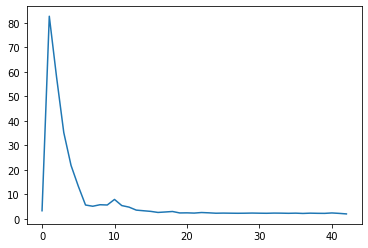

In [150]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [151]:
samples, labels = next(iter(train_loader))
print(samples.shape)

torch.Size([64, 8000])


In [131]:
test[0].to

(tensor([-0.0243,  0.0130,  0.0057,  ...,  0.0000,  0.0000,  0.0000]),
 tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]))

In [134]:
model(test[0][0].to('cuda')).argmax()

tensor(2, device='cuda:0')

In [152]:
samples, labels = next(iter(test_loader))

In [153]:
model(samples[:12].to('cuda')).argmax(dim=-1)

tensor([7, 2, 7, 7, 0, 7, 7, 7, 7, 0, 2, 7], device='cuda:0')

In [154]:
labels[:12].argmax(dim=-1)

tensor([2, 4, 6, 2, 2, 4, 0, 6, 6, 7, 2, 7])